In [81]:
from dataWrangler import *
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import glob 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [82]:
li=[]
for filename in glob.glob(r"..\UsedCar-PriceEstimator\data\*.csv"):
    collection = pd.read_csv(filename, index_col=None, header=0)
    li.append(collection)
frame = pd.concat(li, axis=0, ignore_index=True)

In [83]:
df=Spell(frame)
df=Replace(df)
all_makes=Process(df)

In [84]:
df=Process(df,'toyota camry')

In [85]:
df=Outliers_light(df)

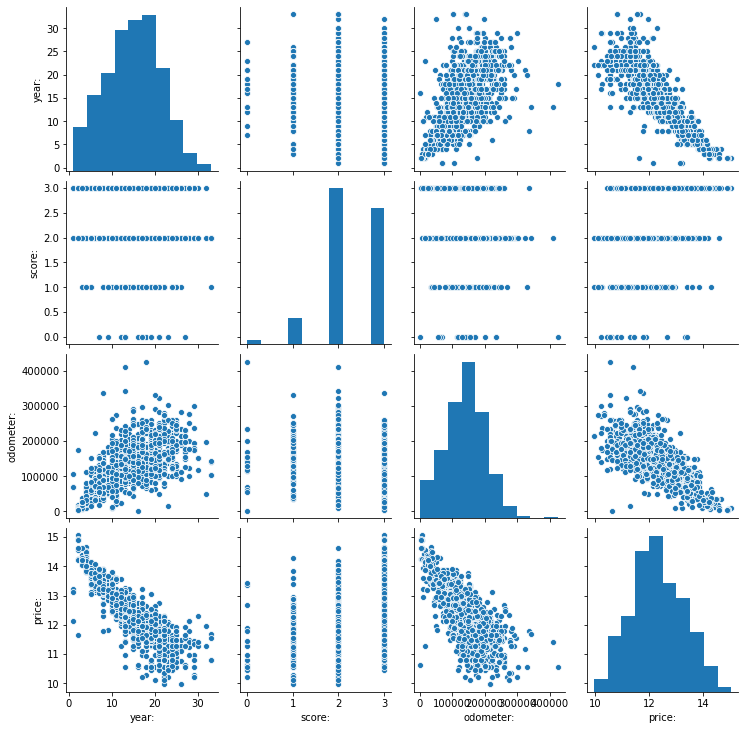

In [60]:
sns.pairplot(data=df)

In [48]:
all_makes=Outliers_light(all_makes)
all_makes.shape

(43097, 5)

In [24]:
df_test = df['Make&Model'].value_counts().rename_axis('unique_values').to_frame('counts')
df_test=df_test.reset_index()
df_test=df_test[(df_test['counts']>430) & (df_test['counts']<620) ]


In [65]:
thelist=list(df_test.unique_values)
    
df_test.tail()

,unique_values,counts
14,honda crv,457
15,ford f250,442
16,volkswagen jetta,438
17,honda odyssey,434
18,toyota sienna,431


In [7]:
df_top4=df[df['Make&Model'].isin(thelist)]

Text(0, 0.5, 'Log Price')

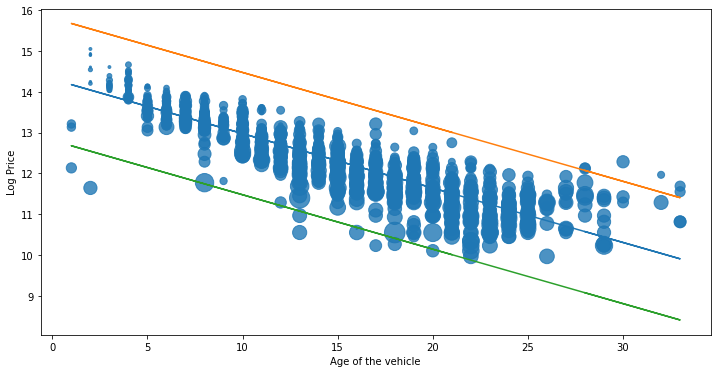

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(df['year:'],df['price:'], s=df['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df['year:'], df['price:'], 1)
plt.plot(df['year:'], m*df['year:']+ b)
plt.plot(df['year:'], m*df['year:']+ b+1.5)
plt.plot(df['year:'], m*df['year:']+ b-1.5)
plt.xlabel('Age of the vehicle')
plt.ylabel('Log Price')

In [66]:
try:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
except:
    m, b = np.polyfit(df['year:'], df['price:'], 1)
df_new=df
for x,y in zip(df['year:'], m*df['year:']+ b-0.5):
    left=x
    bottom=y
    multi_outliers = df_new[(df_new['price:'] <bottom) & (df_new['year:'] < left)]
    df_new=df_new[(~df_new.isin(multi_outliers) )]
for x,y in zip(df['year:'], m*df['year:']+ b+0.5):
    right=x
    top=y
    multi_outliers2 = df[(df['price:'] >top) & (df['year:'] > right) ]
    df_new=df_new[(~df_new.isin(multi_outliers2) )]


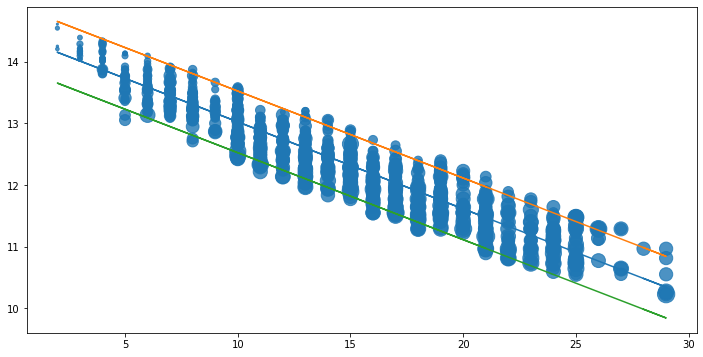

In [68]:
df_new=df_new.dropna()
plt.figure(figsize=(12,6))
plt.scatter(df_new['year:'],df_new['price:'], s=df_new['odometer:']/1000, alpha=0.8)
m, b = np.polyfit(df_new['year:'], df_new['price:'], 1)
plt.plot(df_new['year:'], m*df_new['year:']+ b)
plt.plot(df_new['year:'], m*df_new['year:']+ b+0.5)
plt.plot(df_new['year:'], m*df_new['year:']+ b-0.5)


In [13]:
#import pandas_profiling
#profile=df.profile_report()

In [ ]:
#sns.swarmplot(x,y,data)
#ECDF

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
sns.swarmplot(x='Make&Model',y='price:',data=df_top4)

In [ ]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


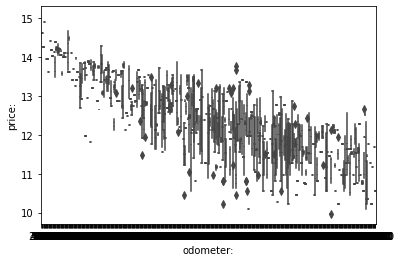

In [98]:
_ = sns.boxplot(x='odometer:', y='price:', data=df)
#np.var
#cdf,
#analog,pmf
#contious pdf

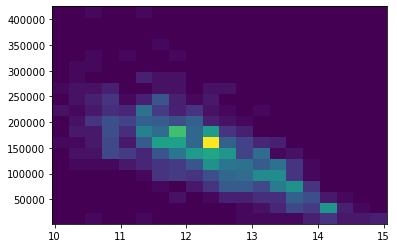

In [99]:
_=plt.hist2d(df['price:'], df['odometer:'], bins=(20,20))

In [ ]:
plt.hexbin(hp, mpg, gridsize=(15,12), 
           extent=(40,235,8,48))

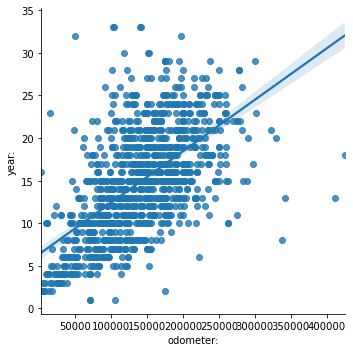

In [80]:
# Plot a linear regression between 'year' and 'odometer'
sns.lmplot(x='odometer:', y='year:', data=df)

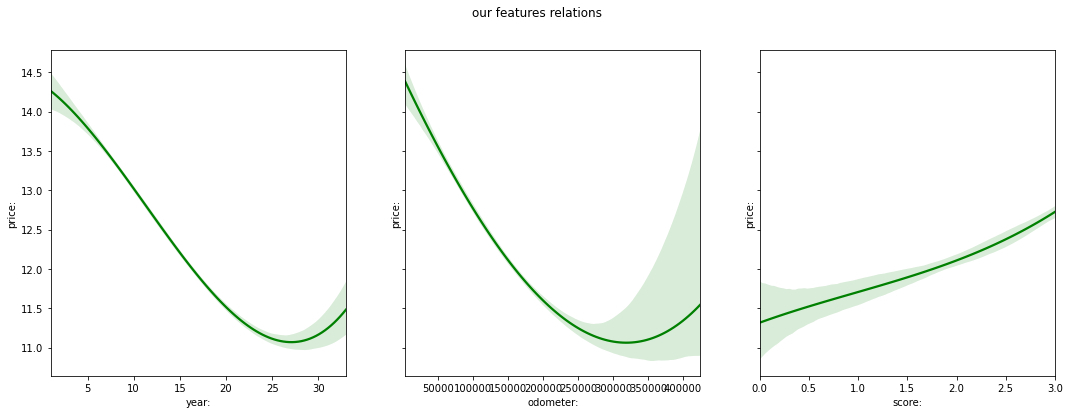

In [117]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[1],x='odometer:', y='price:', data=df, scatter=None, order=3, color='green')
sns.regplot(ax=axes[2],x='score:', y='price:', data=df, scatter=None, order=3, color='green')


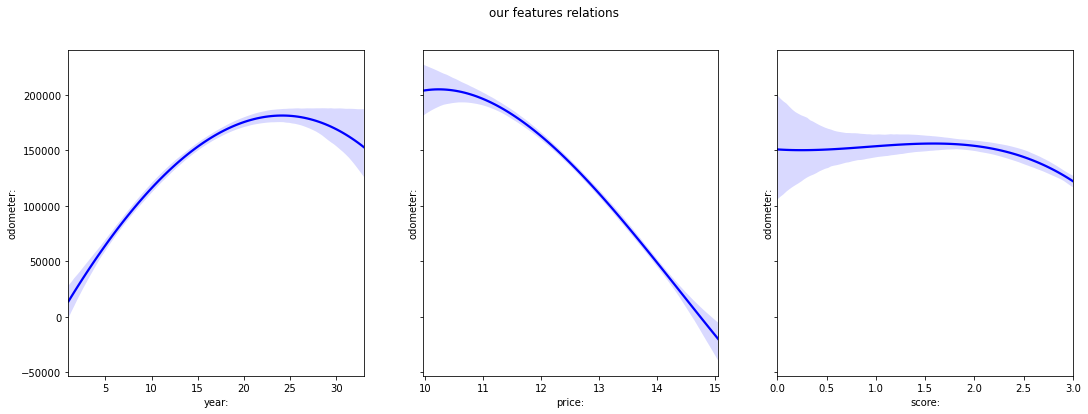

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='year:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[1],x='price:', y='odometer:', data=df, scatter=None, order=3, color='blue')
sns.regplot(ax=axes[2],x='score:', y='odometer:', data=df, scatter=None, order=3, color='blue')


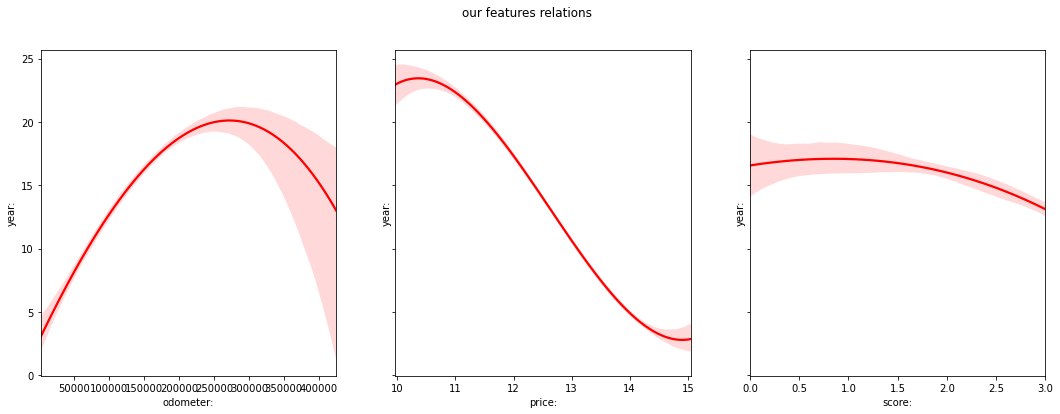

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('our features relations')

sns.regplot(ax=axes[0],x='odometer:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[1],x='price:', y='year:', data=df, scatter=None, order=3, color='red')
sns.regplot(ax=axes[2],x='score:', y='year:', data=df, scatter=None, order=3, color='red')
